In [1]:
# LSTM  para predecir a los pasajeros de las aerolíneas internacionales
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
pd.options.display.max_rows = 10
# semilla aleatoria para rerpoducibilidad
numpy.random.seed(7)

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# cargamos el conjunto de datos
dataset = pd.read_csv('international-airline-passengers.csv',
                        usecols=[1], engine='python', skipfooter=3)

In [5]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = pd.DataFrame(scaler.fit_transform(dataset))

96 48


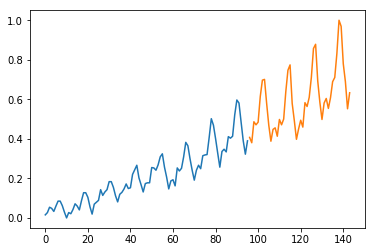

In [37]:
#dividimos datos en entreno y&amp;nbsp; datos para el test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = pd.DataFrame(dataset.iloc[0:train_size,:]), pd.DataFrame(dataset.iloc[train_size::,:])
print(len(train), len(test))
plt.plot(train)
plt.plot(test)
plt.show()

In [52]:
# convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
    x = dataset.iloc[0:-look_back].values
    y = dataset.iloc[look_back::,0].values
    return numpy.array(x), numpy.array(y)

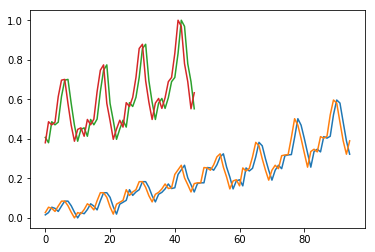

(95, 1) (95,)
(47, 1) (47,)


In [64]:
# remodelamos X=t y Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
plt.plot(trainX)
plt.plot(trainY)
plt.plot(testX)
plt.plot(testY)
plt.show()
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

In [57]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#creamos la LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0350
Epoch 2/100
 - 0s - loss: 0.0164
Epoch 3/100
 - 0s - loss: 0.0141
Epoch 4/100
 - 0s - loss: 0.0131
Epoch 5/100
 - 0s - loss: 0.0122
Epoch 6/100
 - 0s - loss: 0.0112
Epoch 7/100
 - 0s - loss: 0.0102
Epoch 8/100
 - 0s - loss: 0.0092
Epoch 9/100
 - 0s - loss: 0.0083
Epoch 10/100
 - 0s - loss: 0.0073
Epoch 11/100
 - 0s - loss: 0.0065
Epoch 12/100
 - 0s - loss: 0.0056
Epoch 13/100
 - 0s - loss: 0.0049
Epoch 14/100
 - 0s - loss: 0.0042
Epoch 15/100
 - 0s - loss: 0.0037
Epoch 16/100
 - 0s - loss: 0.0032
Epoch 17/100
 - 0s - loss: 0.0028
Epoch 18/100
 - 0s - loss: 0.0026
Epoch 19/100
 - 0s - loss: 0.0023
Epoch 20/100
 - 0s - loss: 0.0024
Epoch 21/100
 - 0s - loss: 0.0022
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - lo

In [67]:
# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

ValueError: Error when checking input: expected lstm_2_input to have 3 dimensions, but got array with shape (95, 1)

In [59]:
# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

ValueError: Expected 2D array, got 1D array instead:
array=[0.02702703 0.05405405 0.04826255 0.03281853 0.05984556 0.08494208
 0.08494208 0.06177606 0.02895753 0.         0.02702703 0.02123552
 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259 0.12741313
 0.12741313 0.1042471  0.05598456 0.01930502 0.06949807 0.07915058
 0.08880309 0.14285714 0.11389961 0.13127413 0.14285714 0.18339768
 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112 0.12934363
 0.14671815 0.17181467 0.14864865 0.15250965 0.22007722 0.24324324
 0.26640927 0.2027027  0.16795367 0.13127413 0.17374517 0.17760618
 0.17760618 0.25482625 0.25289575 0.24131274 0.26833977 0.30888031
 0.32432432 0.25675676 0.20656371 0.14671815 0.18725869 0.19305019
 0.16216216 0.25289575 0.23745174 0.25096525 0.30888031 0.38223938
 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274 0.26640927
 0.24903475 0.31467181 0.31853282 0.32046332 0.40733591 0.5019305
 0.46911197 0.4015444  0.32818533 0.25675676 0.33590734 0.34749035
 0.33397683 0.41119691 0.4034749  0.41312741 0.52123552 0.5965251
 0.58108108 0.48455598 0.38996139 0.32239382 0.38996139].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [14]:
# calculamos el error rms
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Resultado del test: %.2f RMSE' % (testScore))

ValueError: Found input variables with inconsistent numbers of samples: [1, 95]

In [16]:
trainY

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374517],
       [0.177